### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [5]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA6.nc')
mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA6.nc')
mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA6.nc')
mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA6.nc')
mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA6.nc')
mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA6.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA6.nc')
sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA6.nc')
sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA6.nc')
sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA6.nc')
sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA6.nc')
sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA6.nc')

In [6]:
mld_ukesm_1A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1A.nc')
mld_ukesm_1B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_1B.nc')
mld_ukesm_2A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2A.nc')
mld_ukesm_2B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_2B.nc')
mld_ukesm_3A = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3A.nc')
mld_ukesm_3B = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_3B.nc')

mld_tom_1A = xr.open_dataset(f'./extracted-summary/somxl010_tom_1AA7.nc')
mld_tom_1B = xr.open_dataset(f'./extracted-summary/somxl010_tom_1BA7.nc')
mld_tom_2A = xr.open_dataset(f'./extracted-summary/somxl010_tom_2AA7.nc')
mld_tom_2B = xr.open_dataset(f'./extracted-summary/somxl010_tom_2BA7.nc')
mld_tom_3A = xr.open_dataset(f'./extracted-summary/somxl010_tom_3AA7.nc')
mld_tom_3B = xr.open_dataset(f'./extracted-summary/somxl010_tom_3BA7.nc')

sst_ukesm_1A = xr.open_dataset(f'./extracted-summary/SST_ukesm_1A.nc')
sst_ukesm_1B = xr.open_dataset(f'./extracted-summary/SST_ukesm_1B.nc')
sst_ukesm_2A = xr.open_dataset(f'./extracted-summary/SST_ukesm_2A.nc')
sst_ukesm_2B = xr.open_dataset(f'./extracted-summary/SST_ukesm_2B.nc')
sst_ukesm_3A = xr.open_dataset(f'./extracted-summary/SST_ukesm_3A.nc')
sst_ukesm_3B = xr.open_dataset(f'./extracted-summary/SST_ukesm_3B.nc')

sst_tom_1A = xr.open_dataset(f'./extracted-summary/SST_tom_1AA7.nc')
sst_tom_1B = xr.open_dataset(f'./extracted-summary/SST_tom_1BA7.nc')
sst_tom_2A = xr.open_dataset(f'./extracted-summary/SST_tom_2AA7.nc')
sst_tom_2B = xr.open_dataset(f'./extracted-summary/SST_tom_2BA7.nc')
sst_tom_3A = xr.open_dataset(f'./extracted-summary/SST_tom_3AA7.nc')
sst_tom_3B = xr.open_dataset(f'./extracted-summary/SST_tom_3BA7.nc')

In [7]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA6.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_tom_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
ot_tom_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
ot_tom_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
ot_tom_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
ot_tom_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
ot_tom_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ot_ukesm_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
ot_ukesm_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
ot_ukesm_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
ot_ukesm_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
ot_ukesm_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
ot_ukesm_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [8]:
ot_ukesm_1A

<xarray.Dataset>
Dimensions:          (time_counter: 600)
Coordinates:
  * time_counter     (time_counter) datetime64[ns] 1950-01-01 ... 2099-10-01
Data variables:
    max_OT           (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    lat_OT           (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    sigma2000_OT     (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    max_OT_yr        (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    lat_OT_yr        (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    sigma2000_OT_yr  (time_counter) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Attributes:
    made in:  SOZONE/windAnalyis/oceanFields/OT.ipynb
    desc:     where and when does maximum overturning occur

### calculate value given ts and season

In [9]:
def calc_mv(ds, var, yst, yen, seas = 'FY'):
    
    if seas == 'FY':
        tval = ds[var].sel(time_counter=slice(f'{yst}-01-01', f'{yen-1}-12-31')).\
        groupby('time_counter.year').mean().mean(dim = 'year').values
        
    else:
        tval = ds[var].sel\
        (time_counter=(ds['time_counter.season'] == seas)).\
        sel(time_counter=slice(f'{yst}-01-01', f'{yen-1}-12-31')).mean().values
        
    return tval 



## do value calculations for sst, mld, ot, 2010-2020 vs 2090-2100

In [10]:
# st1 = 2010; en1 = 2020; 
# st2 = 2090; en2 = 2100;
# #-------
# sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
# sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
# sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

# sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
# sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
# sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

# sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
# sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
# sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

# sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
# sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
# sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

# sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
# sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
# sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

# sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
# sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
# sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
# sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
# sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

# sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
# sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
# sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

# sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
# sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
# sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

# sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
# sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
# sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

# sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
# sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
# sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

# sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
# sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
# sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

# sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
# sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
# sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
# sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
# sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

# sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
# sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
# sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
# sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
# sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

# sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
# sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
# sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
# sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
# sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

# sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
# sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
# sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
# sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
# sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

# sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
# sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
# sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
# sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
# sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

# sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
# sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
# sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
# sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
# sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

# sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
# sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
# sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
# sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
# sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

# sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
# sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
# sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
# sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
# sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

# sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
# sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
# sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
# sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
# sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

# sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
# sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
# sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
# sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
# sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

# sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
# sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
# sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
# sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
# sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

# sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
# sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
# sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
# sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
# sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

# sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
# sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
# sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
# sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
# sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

# mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
# mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
# mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
# mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
# mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

# mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

# mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

# mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

# mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

# mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

# mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
# mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
# mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
# mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
# mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

# mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
# mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
# mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

# mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
# mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
# mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

# mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
# mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
# mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

# mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
# mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
# mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

# mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
# mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
# mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

# mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
# mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
# mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
# mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
# mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

# mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
# mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
# mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

# mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
# mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
# mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

# mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
# mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
# mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

# mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
# mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
# mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

# mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
# mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
# mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

# mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
# mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
# mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
# mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
# mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

# ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
# ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
# ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
# ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
# ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

# ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

# ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

# ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

# ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

# ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

# ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
# ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
# ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
# ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
# ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

# ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
# ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

# ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
# ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

# ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
# ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

# ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
# ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

# ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
# ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

# ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
# ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
# ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
# ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
# ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

# ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
# ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

# ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
# ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

# ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
# ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

# ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
# ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

# ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
# ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

# ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
# ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
# ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
# ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
# ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

## make modular plotting codes otherwise it's painful

In [11]:
def plot_sst(fig, axs):
    ind = 0*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_FY-sst_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_FY-sst_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_FY-sst_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_FY-sst_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_FY-sst_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_FY-sst_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_FY-sst_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_FY-sst_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_FY-sst_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_FY-sst_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_FY-sst_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_FY-sst_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_DJF-sst_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_DJF-sst_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_DJF-sst_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_DJF-sst_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_DJF-sst_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_DJF-sst_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_DJF-sst_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_DJF-sst_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_DJF-sst_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_DJF-sst_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_DJF-sst_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_DJF-sst_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_MAM-sst_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_MAM-sst_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_MAM-sst_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_MAM-sst_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_MAM-sst_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_MAM-sst_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_MAM-sst_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_MAM-sst_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_MAM-sst_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_MAM-sst_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_MAM-sst_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_MAM-sst_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_JJA-sst_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_JJA-sst_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_JJA-sst_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_JJA-sst_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_JJA-sst_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_JJA-sst_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_JJA-sst_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_JJA-sst_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_JJA-sst_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_JJA-sst_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_JJA-sst_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_JJA-sst_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3; os = 0 #offset
    axs[ind].bar(2+os, sst_ukesm_1A_end_SON-sst_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, sst_ukesm_2A_end_SON-sst_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, sst_ukesm_3A_end_SON-sst_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, sst_ukesm_1B_end_SON-sst_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, sst_ukesm_2B_end_SON-sst_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, sst_ukesm_3B_end_SON-sst_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, sst_tom_1A_end_SON-sst_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, sst_tom_2A_end_SON-sst_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, sst_tom_3A_end_SON-sst_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, sst_tom_1B_end_SON-sst_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, sst_tom_2B_end_SON-sst_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, sst_tom_3B_end_SON-sst_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



In [12]:
def plot_mld(fig, axs):
    ind = 0*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_FY-mld_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_FY-mld_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_FY-mld_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_FY-mld_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_FY-mld_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_FY-mld_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_FY-mld_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_FY-mld_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_FY-mld_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_FY-mld_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_FY-mld_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_FY-mld_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_DJF-mld_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_DJF-mld_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_DJF-mld_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_DJF-mld_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_DJF-mld_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_DJF-mld_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_DJF-mld_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_DJF-mld_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_DJF-mld_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_DJF-mld_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_DJF-mld_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_DJF-mld_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_MAM-mld_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_MAM-mld_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_MAM-mld_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_MAM-mld_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_MAM-mld_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_MAM-mld_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_MAM-mld_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_MAM-mld_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_MAM-mld_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_MAM-mld_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_MAM-mld_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_MAM-mld_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_JJA-mld_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_JJA-mld_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_JJA-mld_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_JJA-mld_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_JJA-mld_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_JJA-mld_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_JJA-mld_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_JJA-mld_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_JJA-mld_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_JJA-mld_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_JJA-mld_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_JJA-mld_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3+1; os = 0 #offset
    axs[ind].bar(2+os, mld_ukesm_1A_end_SON-mld_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, mld_ukesm_2A_end_SON-mld_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, mld_ukesm_3A_end_SON-mld_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, mld_ukesm_1B_end_SON-mld_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, mld_ukesm_2B_end_SON-mld_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, mld_ukesm_3B_end_SON-mld_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, mld_tom_1A_end_SON-mld_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, mld_tom_2A_end_SON-mld_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, mld_tom_3A_end_SON-mld_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, mld_tom_1B_end_SON-mld_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, mld_tom_2B_end_SON-mld_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, mld_tom_3B_end_SON-mld_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



In [13]:
def plot_ot(fig, axs):
    ind = 0*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_FY-ot_ukesm_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_FY-ot_ukesm_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_FY-ot_ukesm_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_FY-ot_ukesm_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_FY-ot_ukesm_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_FY-ot_ukesm_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_FY-ot_tom_1A_sta_FY, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_FY-ot_tom_2A_sta_FY, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_FY-ot_tom_3A_sta_FY, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_FY-ot_tom_1B_sta_FY, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_FY-ot_tom_2B_sta_FY, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_FY-ot_tom_3B_sta_FY, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 1*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_DJF-ot_ukesm_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_DJF-ot_ukesm_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_DJF-ot_ukesm_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_DJF-ot_ukesm_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_DJF-ot_ukesm_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_DJF-ot_ukesm_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_DJF-ot_tom_1A_sta_DJF, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_DJF-ot_tom_2A_sta_DJF, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_DJF-ot_tom_3A_sta_DJF, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_DJF-ot_tom_1B_sta_DJF, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_DJF-ot_tom_2B_sta_DJF, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_DJF-ot_tom_3B_sta_DJF, color = scendict['3B']['color'], width=0.3, hatch = '')

    ind = 2*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_MAM-ot_ukesm_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_MAM-ot_ukesm_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_MAM-ot_ukesm_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_MAM-ot_ukesm_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_MAM-ot_ukesm_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_MAM-ot_ukesm_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_MAM-ot_tom_1A_sta_MAM, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_MAM-ot_tom_2A_sta_MAM, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_MAM-ot_tom_3A_sta_MAM, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_MAM-ot_tom_1B_sta_MAM, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_MAM-ot_tom_2B_sta_MAM, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_MAM-ot_tom_3B_sta_MAM, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 3*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_JJA-ot_ukesm_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_JJA-ot_ukesm_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_JJA-ot_ukesm_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_JJA-ot_ukesm_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_JJA-ot_ukesm_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_JJA-ot_ukesm_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_JJA-ot_tom_1A_sta_JJA, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_JJA-ot_tom_2A_sta_JJA, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_JJA-ot_tom_3A_sta_JJA, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_JJA-ot_tom_1B_sta_JJA, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_JJA-ot_tom_2B_sta_JJA, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_JJA-ot_tom_3B_sta_JJA, color = scendict['3B']['color'], width=0.3, hatch = '')
    #
    ind = 4*3+2; os = 0 #offset
    axs[ind].bar(2+os, ot_ukesm_1A_end_SON-ot_ukesm_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(1+os, ot_ukesm_2A_end_SON-ot_ukesm_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(3+os, ot_ukesm_3A_end_SON-ot_ukesm_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '.')
    axs[ind].bar(5.5+os, ot_ukesm_1B_end_SON-ot_ukesm_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(4.5+os, ot_ukesm_2B_end_SON-ot_ukesm_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '.')
    axs[ind].bar(6.5+os, ot_ukesm_3B_end_SON-ot_ukesm_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '.')
    os = 0.4
    axs[ind].bar(2+os, ot_tom_1A_end_SON-ot_tom_1A_sta_SON, color = scendict['1A']['color'], width=0.3, hatch = '')
    axs[ind].bar(1+os, ot_tom_2A_end_SON-ot_tom_2A_sta_SON, color = scendict['2A']['color'], width=0.3, hatch = '')
    axs[ind].bar(3+os, ot_tom_3A_end_SON-ot_tom_3A_sta_SON, color = scendict['3A']['color'], width=0.3, hatch = '')
    axs[ind].bar(5.5+os, ot_tom_1B_end_SON-ot_tom_1B_sta_SON, color = scendict['1B']['color'], width=0.3, hatch = '')
    axs[ind].bar(4.5+os, ot_tom_2B_end_SON-ot_tom_2B_sta_SON, color = scendict['2B']['color'], width=0.3, hatch = '')
    axs[ind].bar(6.5+os, ot_tom_3B_end_SON-ot_tom_3B_sta_SON, color = scendict['3B']['color'], width=0.3, hatch = '')



In [14]:
def plot_sum(st1,en1,st2,en2):
    
    fact = 0.9
    fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    plot_sst(fig, axs)
    plot_mld(fig, axs)
    plot_ot(fig, axs)


    for i in range(0,15):
        axs[i].set_xticks(np.arange(1,8))
        axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
    #
    #
    ind = 0
    axs[1+ind].set_title(f'MLD ({st2}:{en2})-({st1}:{en1}) \n FY'); axs[1+ind].set_ylabel('m')
    axs[0+ind].set_title(f'SST ({st2}:{en2})-({st1}:{en1}) \n FY'); axs[0+ind].set_ylabel('deg C')
    axs[2+ind].set_title(f'OT ({st2}:{en2})-({st1}:{en1}) \n FY'); axs[2+ind].set_ylabel('Sv')
    ind = 3
    axs[1+ind].set_title('DJF'); axs[1+ind].set_ylabel('m')
    axs[0+ind].set_title('DJF'); axs[0+ind].set_ylabel('deg C')
    axs[2+ind].set_title('DJF'); axs[2+ind].set_ylabel('Sv')
    ind = 6
    axs[1+ind].set_title('MAM'); axs[1+ind].set_ylabel('m')
    axs[0+ind].set_title('MAM'); axs[0+ind].set_ylabel('deg C')
    axs[2+ind].set_title(' MAM'); axs[2+ind].set_ylabel('Sv')
    ind = 9
    axs[1+ind].set_title('JJA'); axs[1+ind].set_ylabel('m')
    axs[0+ind].set_title('JJA'); axs[0+ind].set_ylabel('deg C')
    axs[2+ind].set_title('JJA'); axs[2+ind].set_ylabel('Sv')
    ind = 12
    axs[1+ind].set_title('SON'); axs[1+ind].set_ylabel('m')
    axs[0+ind].set_title('SON'); axs[0+ind].set_ylabel('deg C')
    axs[2+ind].set_title('SON'); axs[2+ind].set_ylabel('Sv')

    plt.suptitle(f'SST, MLD, OT changes from {st1}-{en1} to {st2}-{en2} (dots = UKESM)', fontsize = 18, y = 1.02)

    plt.tight_layout()
    fig.savefig(f'./figs/summary_bargraph{st1}-{en1}--{st2}-{en2}.jpg')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


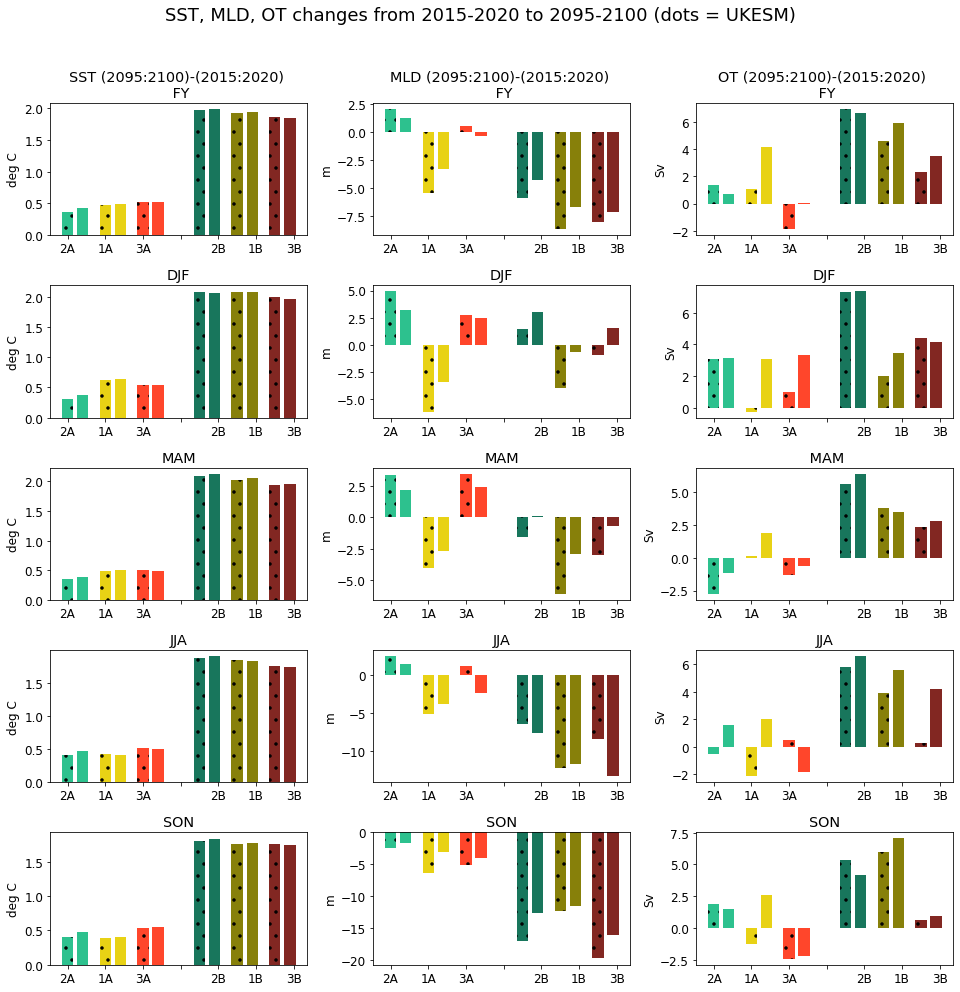

In [15]:
ts = 5
en1 = 2020; st1 = en1-ts;
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

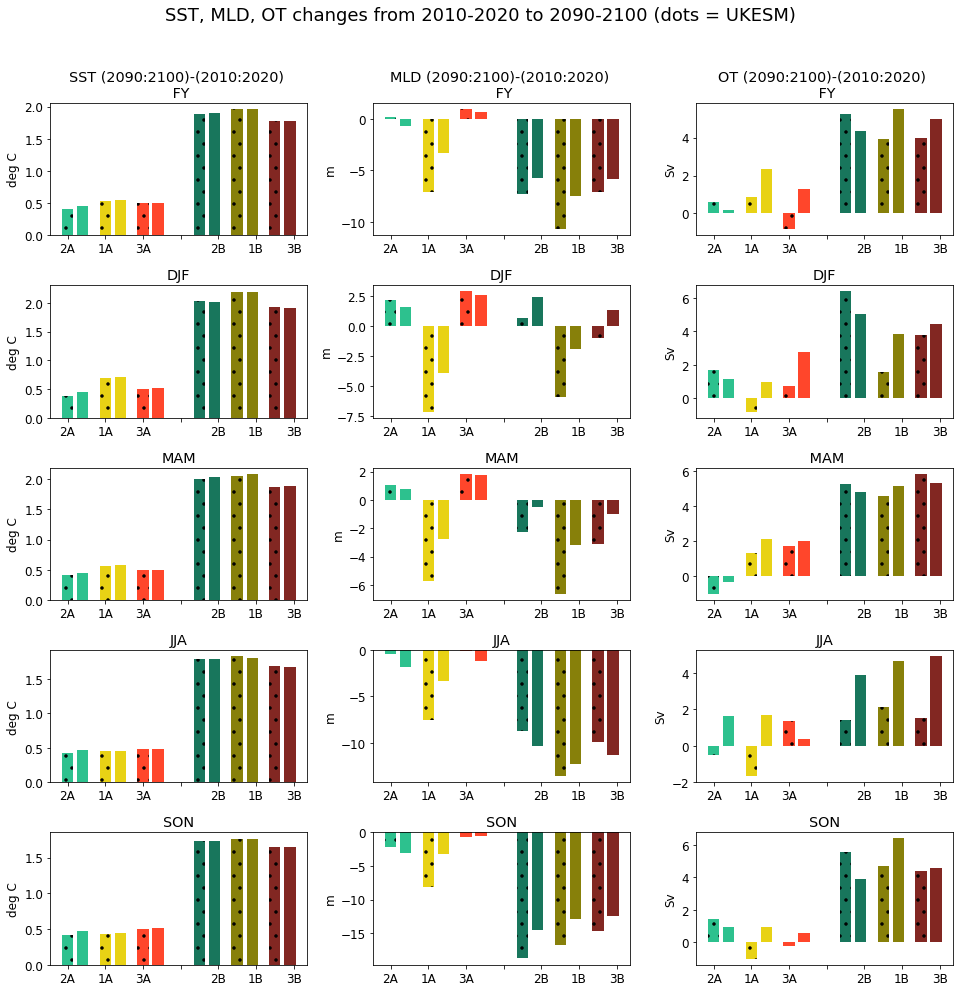

In [16]:
ts = 10
en1 = 2020; st1 = en1-ts;
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

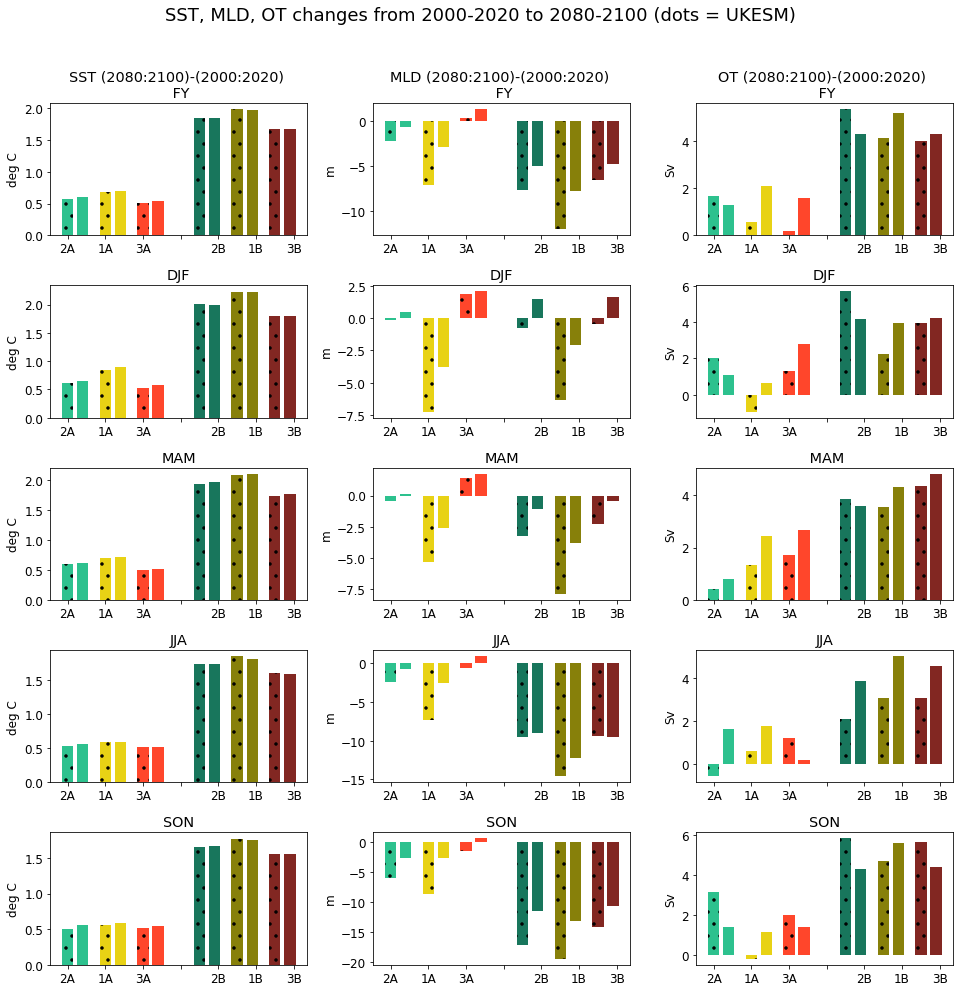

In [17]:
ts = 20
en1 = 2020; st1 = en1-ts;
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

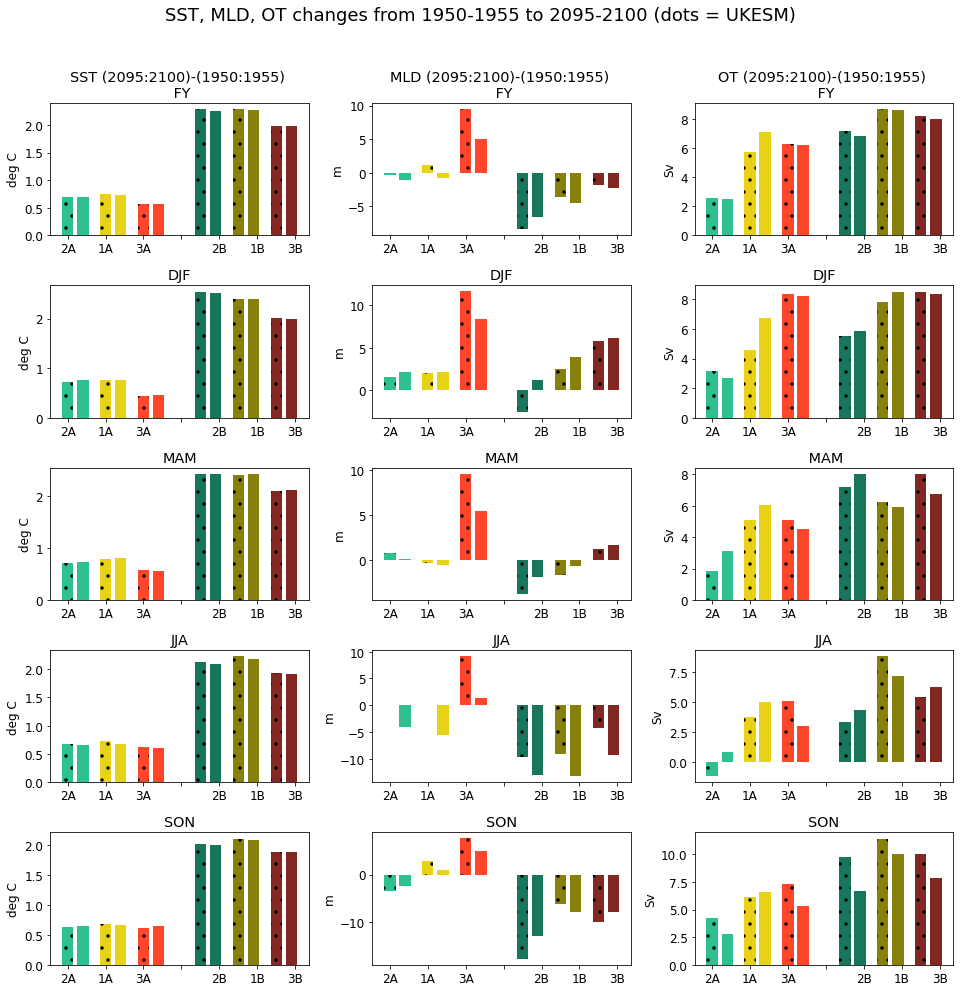

In [18]:
ts = 5
st1 = 1950; en1 = st1+ts 
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

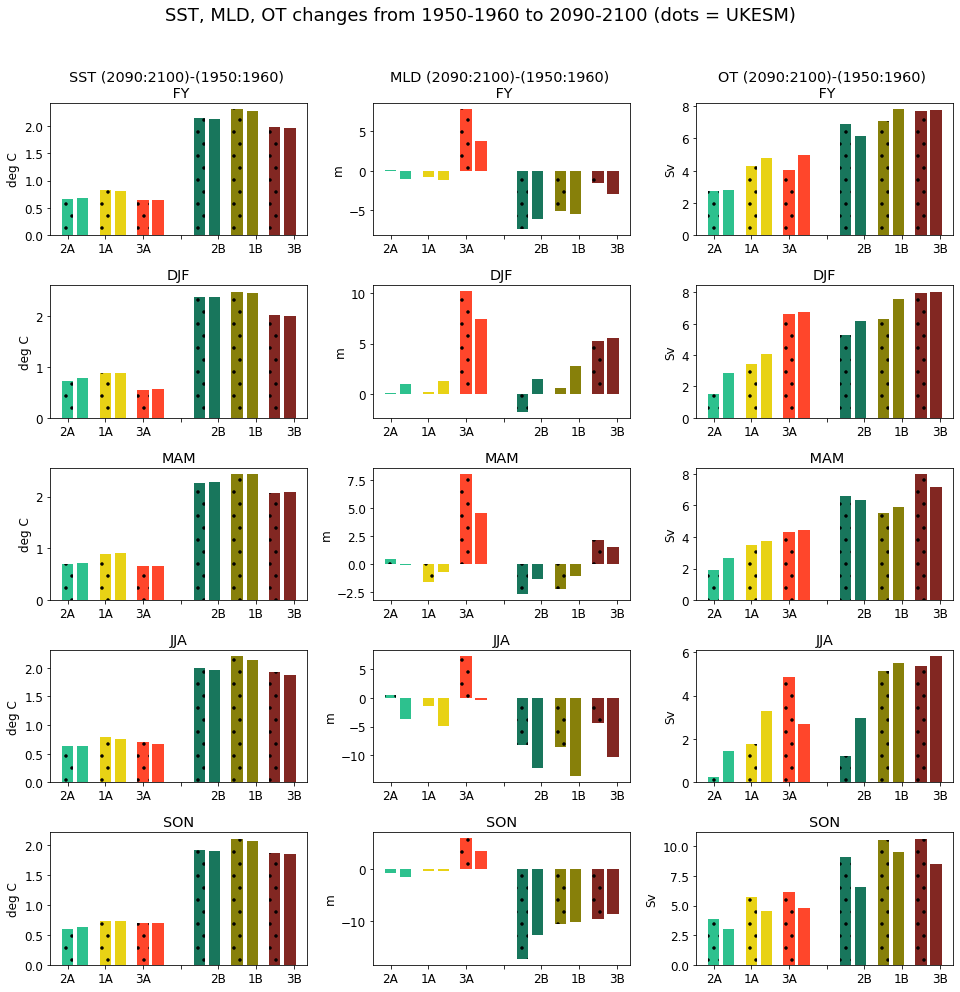

In [19]:
ts = 10
st1 = 1950; en1 = st1+ts 
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

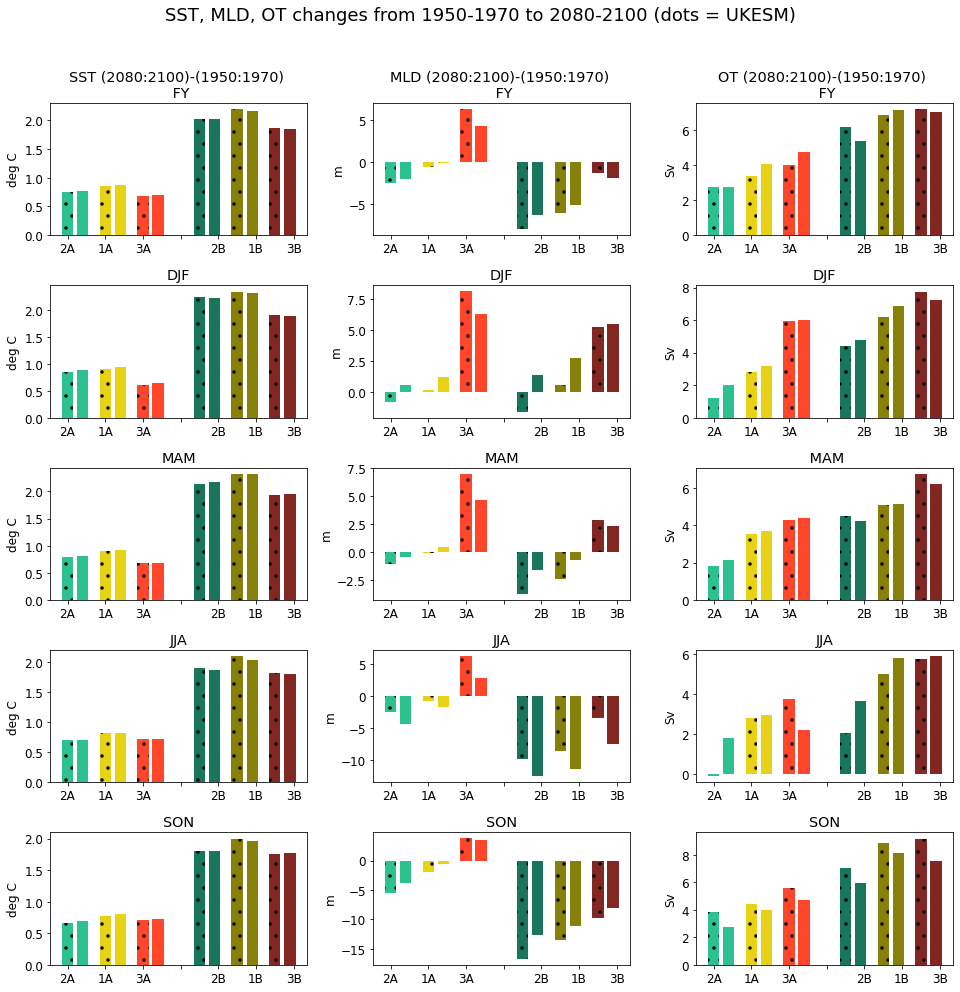

In [20]:
ts = 20
st1 = 1950; en1 = st1+ts 
en2 = 2100; st2 = en2-ts; 
#-------
sst_ukesm_1A_sta_FY = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'FY'))
sst_ukesm_1A_sta_DJF = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'DJF'))
sst_ukesm_1A_sta_MAM = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1A_sta_JJA = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1A_sta_SON = (calc_mv(sst_ukesm_1A, 'tos', st1, en1, 'SON'))  

sst_ukesm_1B_sta_FY = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'FY'))
sst_ukesm_1B_sta_DJF = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'DJF'))
sst_ukesm_1B_sta_MAM = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_1B_sta_JJA = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_1B_sta_SON = (calc_mv(sst_ukesm_1B, 'tos', st1, en1, 'SON'))  

sst_ukesm_2A_sta_FY = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'FY'))
sst_ukesm_2A_sta_DJF = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'DJF'))
sst_ukesm_2A_sta_MAM = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2A_sta_JJA = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2A_sta_SON = (calc_mv(sst_ukesm_2A, 'tos', st1, en1, 'SON'))  

sst_ukesm_2B_sta_FY = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'FY'))
sst_ukesm_2B_sta_DJF = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'DJF'))
sst_ukesm_2B_sta_MAM = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_2B_sta_JJA = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_2B_sta_SON = (calc_mv(sst_ukesm_2B, 'tos', st1, en1, 'SON'))  

sst_ukesm_3A_sta_FY = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'FY'))
sst_ukesm_3A_sta_DJF = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'DJF'))
sst_ukesm_3A_sta_MAM = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3A_sta_JJA = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3A_sta_SON = (calc_mv(sst_ukesm_3A, 'tos', st1, en1, 'SON'))  

sst_ukesm_3B_sta_FY = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'FY'))
sst_ukesm_3B_sta_DJF = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'DJF'))
sst_ukesm_3B_sta_MAM = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'MAM'))  
sst_ukesm_3B_sta_JJA = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'JJA'))  
sst_ukesm_3B_sta_SON = (calc_mv(sst_ukesm_3B, 'tos', st1, en1, 'SON'))  

sst_ukesm_1A_end_FY = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'FY'))
sst_ukesm_1A_end_DJF = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'DJF'))
sst_ukesm_1A_end_MAM = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1A_end_JJA = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1A_end_SON = (calc_mv(sst_ukesm_1A, 'tos', st2, en2, 'SON'))  

sst_ukesm_1B_end_FY = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'FY'))
sst_ukesm_1B_end_DJF = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'DJF'))
sst_ukesm_1B_end_MAM = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_1B_end_JJA = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_1B_end_SON = (calc_mv(sst_ukesm_1B, 'tos', st2, en2, 'SON'))  

sst_ukesm_2A_end_FY = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'FY'))
sst_ukesm_2A_end_DJF = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'DJF'))
sst_ukesm_2A_end_MAM = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2A_end_JJA = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2A_end_SON = (calc_mv(sst_ukesm_2A, 'tos', st2, en2, 'SON'))  

sst_ukesm_2B_end_FY = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'FY'))
sst_ukesm_2B_end_DJF = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'DJF'))
sst_ukesm_2B_end_MAM = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_2B_end_JJA = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_2B_end_SON = (calc_mv(sst_ukesm_2B, 'tos', st2, en2, 'SON'))  

sst_ukesm_3A_end_FY = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'FY'))
sst_ukesm_3A_end_DJF = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'DJF'))
sst_ukesm_3A_end_MAM = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3A_end_JJA = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3A_end_SON = (calc_mv(sst_ukesm_3A, 'tos', st2, en2, 'SON'))  

sst_ukesm_3B_end_FY = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'FY'))
sst_ukesm_3B_end_DJF = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'DJF'))
sst_ukesm_3B_end_MAM = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'MAM'))  
sst_ukesm_3B_end_JJA = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'JJA'))  
sst_ukesm_3B_end_SON = (calc_mv(sst_ukesm_3B, 'tos', st2, en2, 'SON'))  

sst_tom_1A_sta_FY = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'FY'))
sst_tom_1A_sta_DJF = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'DJF'))
sst_tom_1A_sta_MAM = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'MAM'))  
sst_tom_1A_sta_JJA = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'JJA'))  
sst_tom_1A_sta_SON = (calc_mv(sst_tom_1A, 'tos', st1, en1, 'SON'))  

sst_tom_1B_sta_FY = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'FY'))
sst_tom_1B_sta_DJF = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'DJF'))
sst_tom_1B_sta_MAM = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'MAM'))  
sst_tom_1B_sta_JJA = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'JJA'))  
sst_tom_1B_sta_SON = (calc_mv(sst_tom_1B, 'tos', st1, en1, 'SON'))  

sst_tom_2A_sta_FY = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'FY'))
sst_tom_2A_sta_DJF = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'DJF'))
sst_tom_2A_sta_MAM = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'MAM'))  
sst_tom_2A_sta_JJA = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'JJA'))  
sst_tom_2A_sta_SON = (calc_mv(sst_tom_2A, 'tos', st1, en1, 'SON'))  

sst_tom_2B_sta_FY = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'FY'))
sst_tom_2B_sta_DJF = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'DJF'))
sst_tom_2B_sta_MAM = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'MAM'))  
sst_tom_2B_sta_JJA = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'JJA'))  
sst_tom_2B_sta_SON = (calc_mv(sst_tom_2B, 'tos', st1, en1, 'SON'))  

sst_tom_3A_sta_FY = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'FY'))
sst_tom_3A_sta_DJF = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'DJF'))
sst_tom_3A_sta_MAM = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'MAM'))  
sst_tom_3A_sta_JJA = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'JJA'))  
sst_tom_3A_sta_SON = (calc_mv(sst_tom_3A, 'tos', st1, en1, 'SON'))  

sst_tom_3B_sta_FY = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'FY'))
sst_tom_3B_sta_DJF = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'DJF'))
sst_tom_3B_sta_MAM = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'MAM'))  
sst_tom_3B_sta_JJA = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'JJA'))  
sst_tom_3B_sta_SON = (calc_mv(sst_tom_3B, 'tos', st1, en1, 'SON'))  

sst_tom_1A_end_FY = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'FY'))
sst_tom_1A_end_DJF = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'DJF'))
sst_tom_1A_end_MAM = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'MAM'))  
sst_tom_1A_end_JJA = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'JJA'))  
sst_tom_1A_end_SON = (calc_mv(sst_tom_1A, 'tos', st2, en2, 'SON'))  

sst_tom_1B_end_FY = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'FY'))
sst_tom_1B_end_DJF = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'DJF'))
sst_tom_1B_end_MAM = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'MAM'))  
sst_tom_1B_end_JJA = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'JJA'))  
sst_tom_1B_end_SON = (calc_mv(sst_tom_1B, 'tos', st2, en2, 'SON'))  

sst_tom_2A_end_FY = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'FY'))
sst_tom_2A_end_DJF = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'DJF'))
sst_tom_2A_end_MAM = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'MAM'))  
sst_tom_2A_end_JJA = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'JJA'))  
sst_tom_2A_end_SON = (calc_mv(sst_tom_2A, 'tos', st2, en2, 'SON'))  

sst_tom_2B_end_FY = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'FY'))
sst_tom_2B_end_DJF = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'DJF'))
sst_tom_2B_end_MAM = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'MAM'))  
sst_tom_2B_end_JJA = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'JJA'))  
sst_tom_2B_end_SON = (calc_mv(sst_tom_2B, 'tos', st2, en2, 'SON'))  

sst_tom_3A_end_FY = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'FY'))
sst_tom_3A_end_DJF = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'DJF'))
sst_tom_3A_end_MAM = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'MAM'))  
sst_tom_3A_end_JJA = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'JJA'))  
sst_tom_3A_end_SON = (calc_mv(sst_tom_3A, 'tos', st2, en2, 'SON'))  

sst_tom_3B_end_FY = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'FY'))
sst_tom_3B_end_DJF = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'DJF'))
sst_tom_3B_end_MAM = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'MAM'))  
sst_tom_3B_end_JJA = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'JJA'))  
sst_tom_3B_end_SON = (calc_mv(sst_tom_3B, 'tos', st2, en2, 'SON'))  

mld_ukesm_1A_sta_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1A_sta_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1A_sta_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1A_sta_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1A_sta_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1B_sta_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_1B_sta_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_1B_sta_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_1B_sta_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_1B_sta_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2A_sta_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2A_sta_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2A_sta_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2A_sta_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2A_sta_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_2B_sta_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_2B_sta_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_2B_sta_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_2B_sta_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_2B_sta_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3A_sta_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3A_sta_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3A_sta_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3A_sta_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3A_sta_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_3B_sta_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'FY'))
mld_ukesm_3B_sta_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'DJF'))
mld_ukesm_3B_sta_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'MAM'))  
mld_ukesm_3B_sta_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'JJA'))  
mld_ukesm_3B_sta_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st1, en1, 'SON'))  

mld_ukesm_1A_end_FY = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1A_end_DJF = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1A_end_MAM = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1A_end_JJA = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1A_end_SON = (calc_mv(mld_ukesm_1A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_1B_end_FY = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_1B_end_DJF = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_1B_end_MAM = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_1B_end_JJA = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_1B_end_SON = (calc_mv(mld_ukesm_1B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2A_end_FY = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2A_end_DJF = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2A_end_MAM = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2A_end_JJA = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2A_end_SON = (calc_mv(mld_ukesm_2A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_2B_end_FY = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_2B_end_DJF = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_2B_end_MAM = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_2B_end_JJA = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_2B_end_SON = (calc_mv(mld_ukesm_2B, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3A_end_FY = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3A_end_DJF = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3A_end_MAM = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3A_end_JJA = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3A_end_SON = (calc_mv(mld_ukesm_3A, 'somxl010', st2, en2, 'SON'))  

mld_ukesm_3B_end_FY = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'FY'))
mld_ukesm_3B_end_DJF = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'DJF'))
mld_ukesm_3B_end_MAM = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'MAM'))  
mld_ukesm_3B_end_JJA = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'JJA'))  
mld_ukesm_3B_end_SON = (calc_mv(mld_ukesm_3B, 'somxl010', st2, en2, 'SON'))  

mld_tom_1A_sta_FY = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'FY'))
mld_tom_1A_sta_DJF = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'DJF'))
mld_tom_1A_sta_MAM = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1A_sta_JJA = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1A_sta_SON = (calc_mv(mld_tom_1A, 'somxl010', st1, en1, 'SON'))  

mld_tom_1B_sta_FY = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'FY'))
mld_tom_1B_sta_DJF = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'DJF'))
mld_tom_1B_sta_MAM = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_1B_sta_JJA = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_1B_sta_SON = (calc_mv(mld_tom_1B, 'somxl010', st1, en1, 'SON'))  

mld_tom_2A_sta_FY = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'FY'))
mld_tom_2A_sta_DJF = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'DJF'))
mld_tom_2A_sta_MAM = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2A_sta_JJA = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2A_sta_SON = (calc_mv(mld_tom_2A, 'somxl010', st1, en1, 'SON'))  

mld_tom_2B_sta_FY = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'FY'))
mld_tom_2B_sta_DJF = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'DJF'))
mld_tom_2B_sta_MAM = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_2B_sta_JJA = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_2B_sta_SON = (calc_mv(mld_tom_2B, 'somxl010', st1, en1, 'SON'))  

mld_tom_3A_sta_FY = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'FY'))
mld_tom_3A_sta_DJF = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'DJF'))
mld_tom_3A_sta_MAM = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3A_sta_JJA = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3A_sta_SON = (calc_mv(mld_tom_3A, 'somxl010', st1, en1, 'SON'))  

mld_tom_3B_sta_FY = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'FY'))
mld_tom_3B_sta_DJF = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'DJF'))
mld_tom_3B_sta_MAM = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'MAM'))  
mld_tom_3B_sta_JJA = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'JJA'))  
mld_tom_3B_sta_SON = (calc_mv(mld_tom_3B, 'somxl010', st1, en1, 'SON'))  

mld_tom_1A_end_FY = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'FY'))
mld_tom_1A_end_DJF = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'DJF'))
mld_tom_1A_end_MAM = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1A_end_JJA = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1A_end_SON = (calc_mv(mld_tom_1A, 'somxl010', st2, en2, 'SON'))  

mld_tom_1B_end_FY = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'FY'))
mld_tom_1B_end_DJF = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'DJF'))
mld_tom_1B_end_MAM = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_1B_end_JJA = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_1B_end_SON = (calc_mv(mld_tom_1B, 'somxl010', st2, en2, 'SON'))  

mld_tom_2A_end_FY = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'FY'))
mld_tom_2A_end_DJF = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'DJF'))
mld_tom_2A_end_MAM = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2A_end_JJA = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2A_end_SON = (calc_mv(mld_tom_2A, 'somxl010', st2, en2, 'SON'))  

mld_tom_2B_end_FY = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'FY'))
mld_tom_2B_end_DJF = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'DJF'))
mld_tom_2B_end_MAM = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_2B_end_JJA = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_2B_end_SON = (calc_mv(mld_tom_2B, 'somxl010', st2, en2, 'SON'))  

mld_tom_3A_end_FY = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'FY'))
mld_tom_3A_end_DJF = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'DJF'))
mld_tom_3A_end_MAM = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3A_end_JJA = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3A_end_SON = (calc_mv(mld_tom_3A, 'somxl010', st2, en2, 'SON'))  

mld_tom_3B_end_FY = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'FY'))
mld_tom_3B_end_DJF = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'DJF'))
mld_tom_3B_end_MAM = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'MAM'))  
mld_tom_3B_end_JJA = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'JJA'))  
mld_tom_3B_end_SON = (calc_mv(mld_tom_3B, 'somxl010', st2, en2, 'SON'))  

ot_ukesm_1A_sta_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1A_sta_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1A_sta_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1A_sta_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1A_sta_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1B_sta_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_1B_sta_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_1B_sta_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_1B_sta_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_1B_sta_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2A_sta_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2A_sta_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2A_sta_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2A_sta_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2A_sta_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_2B_sta_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_2B_sta_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_2B_sta_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_2B_sta_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_2B_sta_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3A_sta_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3A_sta_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3A_sta_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3A_sta_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3A_sta_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_3B_sta_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_ukesm_3B_sta_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'DJF'))
ot_ukesm_3B_sta_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'MAM'))  
ot_ukesm_3B_sta_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'JJA'))  
ot_ukesm_3B_sta_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st1, en1, 'SON'))  

ot_ukesm_1A_end_FY = (calc_mv(ot_ukesm_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1A_end_DJF = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1A_end_MAM = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1A_end_JJA = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1A_end_SON = (calc_mv(ot_ukesm_1A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_1B_end_FY = (calc_mv(ot_ukesm_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_1B_end_DJF = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_1B_end_MAM = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_1B_end_JJA = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_1B_end_SON = (calc_mv(ot_ukesm_1B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2A_end_FY = (calc_mv(ot_ukesm_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2A_end_DJF = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2A_end_MAM = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2A_end_JJA = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2A_end_SON = (calc_mv(ot_ukesm_2A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_2B_end_FY = (calc_mv(ot_ukesm_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_2B_end_DJF = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_2B_end_MAM = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_2B_end_JJA = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_2B_end_SON = (calc_mv(ot_ukesm_2B, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3A_end_FY = (calc_mv(ot_ukesm_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3A_end_DJF = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3A_end_MAM = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3A_end_JJA = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3A_end_SON = (calc_mv(ot_ukesm_3A, 'max_OT', st2, en2, 'SON'))  

ot_ukesm_3B_end_FY = (calc_mv(ot_ukesm_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_ukesm_3B_end_DJF = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'DJF'))
ot_ukesm_3B_end_MAM = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'MAM'))  
ot_ukesm_3B_end_JJA = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'JJA'))  
ot_ukesm_3B_end_SON = (calc_mv(ot_ukesm_3B, 'max_OT', st2, en2, 'SON'))  

ot_tom_1A_sta_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1A_sta_DJF = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'DJF'))
ot_tom_1A_sta_MAM = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1A_sta_JJA = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1A_sta_SON = (calc_mv(ot_tom_1A, 'max_OT', st1, en1, 'SON'))  

ot_tom_1B_sta_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_1B_sta_DJF = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'DJF'))
ot_tom_1B_sta_MAM = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_1B_sta_JJA = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_1B_sta_SON = (calc_mv(ot_tom_1B, 'max_OT', st1, en1, 'SON'))  

ot_tom_2A_sta_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2A_sta_DJF = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'DJF'))
ot_tom_2A_sta_MAM = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2A_sta_JJA = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2A_sta_SON = (calc_mv(ot_tom_2A, 'max_OT', st1, en1, 'SON'))  

ot_tom_2B_sta_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_2B_sta_DJF = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'DJF'))
ot_tom_2B_sta_MAM = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_2B_sta_JJA = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_2B_sta_SON = (calc_mv(ot_tom_2B, 'max_OT', st1, en1, 'SON'))  

ot_tom_3A_sta_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3A_sta_DJF = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'DJF'))
ot_tom_3A_sta_MAM = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3A_sta_JJA = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3A_sta_SON = (calc_mv(ot_tom_3A, 'max_OT', st1, en1, 'SON'))  

ot_tom_3B_sta_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st1, en1, 'FY'))
ot_tom_3B_sta_DJF = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'DJF'))
ot_tom_3B_sta_MAM = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'MAM'))  
ot_tom_3B_sta_JJA = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'JJA'))  
ot_tom_3B_sta_SON = (calc_mv(ot_tom_3B, 'max_OT', st1, en1, 'SON'))  

ot_tom_1A_end_FY = (calc_mv(ot_tom_1A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1A_end_DJF = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'DJF'))
ot_tom_1A_end_MAM = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1A_end_JJA = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1A_end_SON = (calc_mv(ot_tom_1A, 'max_OT', st2, en2, 'SON'))  

ot_tom_1B_end_FY = (calc_mv(ot_tom_1B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_1B_end_DJF = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'DJF'))
ot_tom_1B_end_MAM = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_1B_end_JJA = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_1B_end_SON = (calc_mv(ot_tom_1B, 'max_OT', st2, en2, 'SON'))  

ot_tom_2A_end_FY = (calc_mv(ot_tom_2A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2A_end_DJF = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'DJF'))
ot_tom_2A_end_MAM = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2A_end_JJA = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2A_end_SON = (calc_mv(ot_tom_2A, 'max_OT', st2, en2, 'SON'))  

ot_tom_2B_end_FY = (calc_mv(ot_tom_2B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_2B_end_DJF = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'DJF'))
ot_tom_2B_end_MAM = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_2B_end_JJA = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_2B_end_SON = (calc_mv(ot_tom_2B, 'max_OT', st2, en2, 'SON'))  

ot_tom_3A_end_FY = (calc_mv(ot_tom_3A, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3A_end_DJF = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'DJF'))
ot_tom_3A_end_MAM = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3A_end_JJA = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3A_end_SON = (calc_mv(ot_tom_3A, 'max_OT', st2, en2, 'SON'))  

ot_tom_3B_end_FY = (calc_mv(ot_tom_3B, 'max_OT_yr', st2, en2, 'FY'))
ot_tom_3B_end_DJF = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'DJF'))
ot_tom_3B_end_MAM = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'MAM'))  
ot_tom_3B_end_JJA = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'JJA'))  
ot_tom_3B_end_SON = (calc_mv(ot_tom_3B, 'max_OT', st2, en2, 'SON'))  

plot_sum(st1,en1,st2,en2)

In [21]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [22]:
def make_yearlist_tom(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}-TOMA6.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

TOMOT_1A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1A'))
TOMOT_2A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2A'))
TOMOT_3A = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3A'))
TOMOT_1B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'1B'))
TOMOT_2B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'2B'))
TOMOT_3B = xr.open_mfdataset(make_yearlist_tom(1950,2099,'3B'))

def make_yearlist(yrst, yrend, tscen, \
                  tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/max_OT/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'{tdir}/seas_OT_{yr}_{tscen}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

OT_1A = xr.open_mfdataset(make_yearlist(1950,2099,'1A'))
OT_2A = xr.open_mfdataset(make_yearlist(1950,2099,'2A'))
OT_3A = xr.open_mfdataset(make_yearlist(1950,2099,'3A'))
OT_1B = xr.open_mfdataset(make_yearlist(1950,2099,'1B'))
OT_2B = xr.open_mfdataset(make_yearlist(1950,2099,'2B'))
OT_3B = xr.open_mfdataset(make_yearlist(1950,2099,'3B'))

In [23]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}

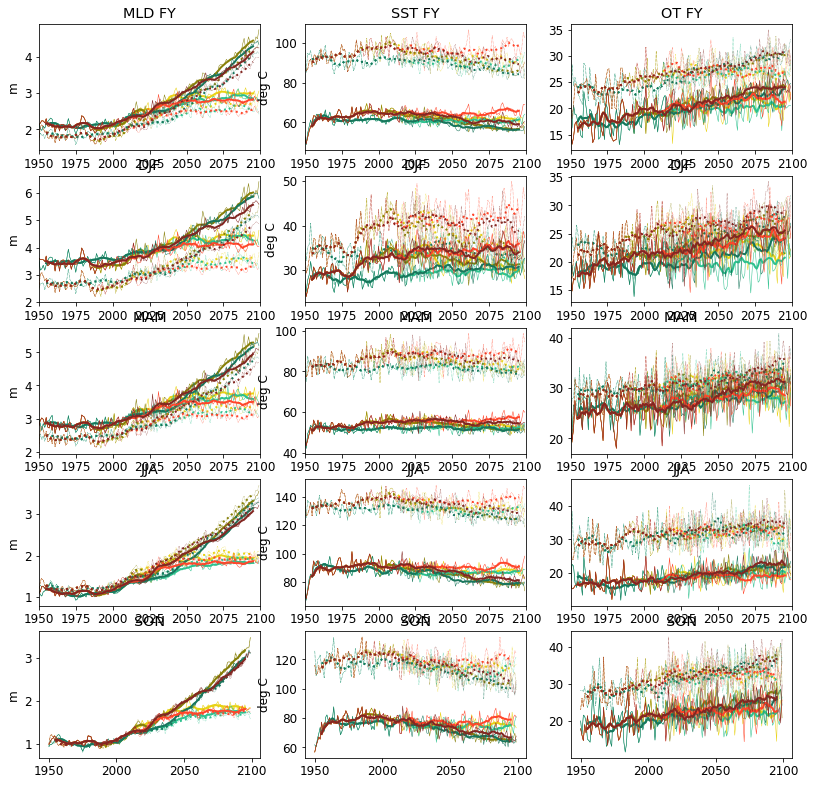

<Figure size 432x288 with 0 Axes>

In [24]:
fact = 0.9
fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

seas = ['DJF','MAM','JJA','SON']
    
# fact = 1.1
# fig, axs = plt.subplots(4,1, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

for m in range(0,6):#len(models)):
    
    ###
    os = 0
    tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
            
    tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 2)
    
    ####
    os = 1
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_{models[m]}.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
            
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_tom_{models[m]}A6.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 2)
            
#####
os = 2
models = [OT_1A,OT_1B,OT_2A,OT_2B,OT_3A,OT_3B,\
     ]
models2 = [TOMOT_1A,TOMOT_1B,TOMOT_2A,TOMOT_2B,TOMOT_3A,TOMOT_3B,\
     ]
scens = ['1A','1B','2A','2B','3A','3B']
for m in range(0,len(models)):
    
    tmod = models[m]
    tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == 'DJF'))
    tv = tpl.groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[2].plot(tv.year,tv.max_OT_yr, color = scendict[scens[m]]['color'],\
                linestyle = ':', linewidth = 0.5)            
    axs[2].plot(tv_rol.year,tv_rol.max_OT_yr, color = scendict[scens[m]]['color'],\
                linestyle = ':', linewidth = 2)
        

    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv = tv.chunk(10)
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[(i+1)*3+os].plot(tv.year,tv.max_OT, color = scendict[scens[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[(i+1)*3+os].plot(tv_rol.year,tv_rol.max_OT, color = scendict[scens[m]]['color'],\
                        linestyle = ':', linewidth = 2)
       
            
    tmod = models2[m]
    tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == 'DJF'))
    tv = tpl.groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
    axs[2].plot(tv.year,tv.max_OT_yr, color = scendict[scens[m]]['color'],\
                linestyle = '-', linewidth = 0.5)            
    axs[2].plot(tv_rol.year,tv_rol.max_OT_yr, color = scendict[scens[m]]['color'],\
                label = scendict[scens[m]]['name'],
                linestyle = '-', linewidth = 2)
    

    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv = tv.chunk(10)
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[(i+1)*3+os].plot(tv.year,tv.max_OT, color = scendict[scens[m]]['color'],\
                        linestyle = '-', linewidth = 0.5)            
            axs[(i+1)*3+os].plot(tv_rol.year,tv_rol.max_OT, color = scendict[scens[m]]['color'],\
                        label = scendict[scens[m]]['name'],
                        linestyle = '-', linewidth = 2)

 
            
for i in range(0,12):
    
    axs[i].set_xlim([1950,2100])
    
ind = 0
axs[0+ind].set_title('MLD FY'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST FY'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT FY')
    
ind = 3
axs[0+ind].set_title('DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('DJF')
ind = 6
axs[0+ind].set_title('MAM'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('MAM'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('MAM')
ind = 9
axs[0+ind].set_title('JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('JJA')
ind = 12
axs[0+ind].set_title('SON'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SON'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('SON')
            
            
plt.tight_layout()

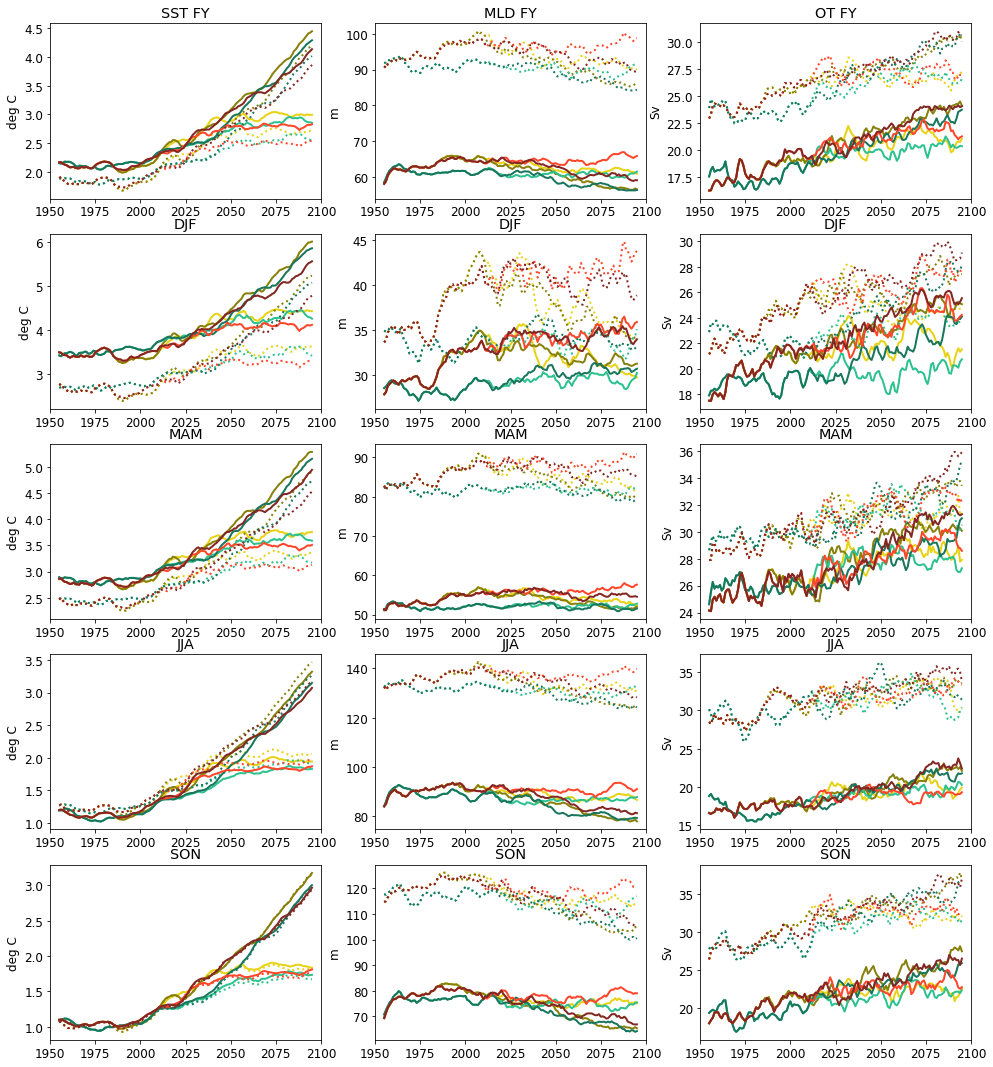

<Figure size 432x288 with 0 Axes>

In [25]:
fact = 1.1
fig, axs = plt.subplots(5,3, figsize=(15*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

seas = ['DJF','MAM','JJA','SON']
    
# fact = 1.1
# fig, axs = plt.subplots(4,1, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

for m in range(0,6):#len(models)):
    
    ###
    os = 0
    tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                 linestyle = ':', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
            
    tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                 linestyle = '-', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                         linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 2)
    
    ####
    os = 1
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_ukesm_{models[m]}.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
#                 linestyle = ':', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                linestyle = ':', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
            
    tmod = xr.open_dataset(f'./extracted-summary/somxl010_tom_{models[m]}A6.nc')
    ind = 0+os
    tpl = tmod
    tv = tpl.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
#                 linestyle = '-', linewidth = 0.5)            
    axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                linestyle = '-', linewidth = 2)
    for i in range(0,4):
            ind = (i+1)*3+os
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'],\
#                         linestyle = '-', linewidth = 0.5)            
            axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'],\
                        linestyle = '-', linewidth = 2)
            
#####
os = 2
models = [OT_1A,OT_1B,OT_2A,OT_2B,OT_3A,OT_3B,\
     ]
models2 = [TOMOT_1A,TOMOT_1B,TOMOT_2A,TOMOT_2B,TOMOT_3A,TOMOT_3B,\
     ]
scens = ['1A','1B','2A','2B','3A','3B']
for m in range(0,len(models)):
    
    tmod = models[m]
    tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == 'DJF'))
    tv = tpl.groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[2].plot(tv.year,tv.max_OT_yr, color = scendict[scens[m]]['color'],\
#                 linestyle = ':', linewidth = 0.5)            
    axs[2].plot(tv_rol.year,tv_rol.max_OT_yr, color = scendict[scens[m]]['color'],\
                linestyle = ':', linewidth = 2)
        

    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv = tv.chunk(10)
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[(i+1)*3+os].plot(tv.year,tv.max_OT, color = scendict[scens[m]]['color'],\
#                         linestyle = ':', linewidth = 0.5)            
            axs[(i+1)*3+os].plot(tv_rol.year,tv_rol.max_OT, color = scendict[scens[m]]['color'],\
                        linestyle = ':', linewidth = 2)
       
            
    tmod = models2[m]
    tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == 'DJF'))
    tv = tpl.groupby('time_counter.year').mean()
    tv = tv.chunk(10)
    tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[2].plot(tv.year,tv.max_OT_yr, color = scendict[scens[m]]['color'],\
#                 linestyle = '-', linewidth = 0.5)            
    axs[2].plot(tv_rol.year,tv_rol.max_OT_yr, color = scendict[scens[m]]['color'],\
                label = scendict[scens[m]]['name'],
                linestyle = '-', linewidth = 2)
    

    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv = tv.chunk(10)
            tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[(i+1)*3+os].plot(tv.year,tv.max_OT, color = scendict[scens[m]]['color'],\
#                         linestyle = '-', linewidth = 0.5)            
            axs[(i+1)*3+os].plot(tv_rol.year,tv_rol.max_OT, color = scendict[scens[m]]['color'],\
                        label = scendict[scens[m]]['name'],
                        linestyle = '-', linewidth = 2)

 
            
for i in range(0,15):
    
    axs[i].set_xlim([1950,2100])
    axs[i].set_xlim([1950,2100])
    
ind = 0
axs[0+ind].set_title('SST FY'); axs[0+ind].set_ylabel('deg C')
axs[1+ind].set_title('MLD FY'); axs[1+ind].set_ylabel('m')
axs[2+ind].set_title('OT FY'); axs[2+ind].set_ylabel('Sv')
    
ind = 3
axs[0+ind].set_title('DJF'); axs[0+ind].set_ylabel('deg C')
axs[1+ind].set_title('DJF'); axs[1+ind].set_ylabel('m')
axs[2+ind].set_title('DJF'); axs[2+ind].set_ylabel('Sv')
ind = 6
axs[0+ind].set_title('MAM'); axs[0+ind].set_ylabel('deg C')
axs[1+ind].set_title('MAM'); axs[1+ind].set_ylabel('m')
axs[2+ind].set_title('MAM'); axs[2+ind].set_ylabel('Sv')
ind = 9
axs[0+ind].set_title('JJA'); axs[0+ind].set_ylabel('deg C')
axs[1+ind].set_title('JJA'); axs[1+ind].set_ylabel('m')
axs[2+ind].set_title('JJA'); axs[2+ind].set_ylabel('Sv')
ind = 12
axs[0+ind].set_title('SON'); axs[0+ind].set_ylabel('deg C')
axs[1+ind].set_title('SON'); axs[1+ind].set_ylabel('m')
axs[2+ind].set_title('SON'); axs[2+ind].set_ylabel('Sv')
            
            
plt.tight_layout()

fig.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-seasonalts.jpg")

In [26]:
            
#             axs[0].legend(ncol = 3, fontsize = 10)            
        
#     tmod = xr.open_dataset(f'./extracted-summary/somxl010_tom_{models[m]}A6.nc')
#     ind = i*3
#     tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#     tv = tpl.groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'], \
#                 linestyle = '-', linewidth = 0.5)            
#     axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
#                 linestyle = '-', linewidth = 2)
#     for i in range(0,4):
#             ind = i*3
#             tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#             tv = tpl.groupby('time_counter.year').mean()
#             tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.somxl010, color = mod[models[m]]['color'], \
#                         linestyle = '-', linewidth = 0.5)            
#             axs[ind].plot(tv_rol.year,tv_rol.somxl010, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
#                         linestyle = '-', linewidth = 2)

#     tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
#     for i in range(0,4):
#             ind = i*3+1
#             tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#             tv = tpl.groupby('time_counter.year').mean()
#             tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 0.5)            
#             axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 2)
# #             axs[0].legend(ncol = 3, fontsize = 10)            
        
#     tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
#     for i in range(0,4):
#             ind = i*3+1
#             tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#             tv = tpl.groupby('time_counter.year').mean()
#             tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'], \
#                         linestyle = '-', linewidth = 0.5)            
#             axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
#                         linestyle = '-', linewidth = 2)

# ###overturning
    
#     tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
#     for i in range(0,4):
#             ind = i*3+1
#             tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#             tv = tpl.groupby('time_counter.year').mean()
#             tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 0.5)            
#             axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
#                         linestyle = ':', linewidth = 2)
# #             axs[0].legend(ncol = 3, fontsize = 10)            
        
#     tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
#     for i in range(0,4):
#             ind = i*3+1
#             tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
#             tv = tpl.groupby('time_counter.year').mean()
#             tv_rol = tv.rolling(year=10, center=True).mean()
#             axs[ind].plot(tv.year,tv.tos, color = mod[models[m]]['color'], \
#                         linestyle = '-', linewidth = 0.5)            
#             axs[ind].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
#                         linestyle = '-', linewidth = 2)
            